# ECON 220 - Data Science for Economists
## Week 9 - Handling IPUMS Data (Part 2)
### Instructor: Jafet Baca-Obando

Today, we will use a relatively "big" dataset and learn how to download, clean, process, and analyze bigger than average data.

## Step 1. Import required packages

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
path = os.getcwd()

## Step 2. Load and explore the data

Let us first download the dataset from IPUMS USA.

In [10]:
data = pd.read_csv('usa_00004.csv')

In [11]:
# Describe the data
data.describe()

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STRATA,GQ,PERNUM,PERWT,SEX,AGE,MARST,RACE,RACED,HCOVANY,EDUC,EDUCD,SCHLTYPE,INCTOT
count,3405809.0,3405809.0,3.405809e+06,3.405809e+06,3.405809e+06,3.405809e+06,3.405809e+06,3.405809e+06,3.405809e+06,3.405809e+06,3.405809e+06,3.405809e+06,3.405809e+06,3.405809e+06,3.405809e+06,3.405809e+06,3.405809e+06,3.405809e+06,3.405809e+06,3.405809e+06
mean,2023.0,202301.0,7.589917e+05,2.023001e+12,9.723818e+01,2.023008e+12,4.888102e+05,1.134287e+00,2.057684e+00,9.833637e+01,1.509099e+00,4.311174e+01,3.593254e+00,2.535423e+00,2.579036e+02,1.929673e+00,6.411226e+00,6.656684e+01,1.234843e+00,1.563316e+06
std,0.0,0.0,4.414736e+05,2.111813e+06,8.743515e+01,4.414736e+06,8.443947e+05,5.784842e-01,1.331731e+00,8.923316e+01,4.999173e-01,2.397471e+01,2.309036e+00,2.607952e+00,2.679706e+02,2.556972e-01,3.260914e+00,3.246812e+01,5.659658e-01,3.571338e+06
min,2023.0,202301.0,1.000000e+00,2.023000e+12,1.000000e+00,2.023000e+12,1.000100e+04,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+02,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,-1.230000e+04
25%,2023.0,202301.0,3.723860e+05,2.023000e+12,4.800000e+01,2.023004e+12,1.000050e+05,1.000000e+00,1.000000e+00,4.700000e+01,1.000000e+00,2.200000e+01,1.000000e+00,1.000000e+00,1.000000e+02,2.000000e+00,6.000000e+00,6.100000e+01,1.000000e+00,1.300000e+04
50%,2023.0,202301.0,7.568300e+05,2.023001e+12,7.100000e+01,2.023008e+12,2.312480e+05,1.000000e+00,2.000000e+00,7.200000e+01,2.000000e+00,4.400000e+01,4.000000e+00,1.000000e+00,1.000000e+02,2.000000e+00,6.000000e+00,6.500000e+01,1.000000e+00,4.120000e+04
75%,2023.0,202301.0,1.147002e+06,2.023001e+12,1.150000e+02,2.023011e+12,4.801480e+05,1.000000e+00,3.000000e+00,1.170000e+02,2.000000e+00,6.300000e+01,6.000000e+00,2.000000e+00,2.000000e+02,2.000000e+00,1.000000e+01,1.010000e+02,1.000000e+00,1.041900e+05
max,2023.0,202301.0,1.519010e+06,2.023010e+12,2.225000e+03,2.023015e+12,8.100351e+06,5.000000e+00,2.000000e+01,2.225000e+03,2.000000e+00,9.600000e+01,6.000000e+00,9.000000e+00,9.900000e+02,2.000000e+00,1.100000e+01,1.160000e+02,3.000000e+00,9.999999e+06


In [12]:
# Print a few rows of the data
data.head(10)

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STRATA,GQ,PERNUM,PERWT,SEX,AGE,MARST,RACE,RACED,HCOVANY,EDUC,EDUCD,SCHLTYPE,INCTOT
0,2023,202301,1,2023010000113,6.0,2023000000011,280201,3,1,6.0,2,86,5,2,200,2,6,63,1,11500
1,2023,202301,2,2023010000180,27.0,2023000000021,10001,3,1,27.0,1,60,6,1,100,1,6,63,1,0
2,2023,202301,3,2023010000181,47.0,2023000000031,40201,4,1,47.0,1,20,6,1,100,2,7,71,3,0
3,2023,202301,4,2023010000250,11.0,2023000000041,270201,3,1,11.0,2,13,6,2,200,2,2,26,2,9999999
4,2023,202301,5,2023010000340,57.0,2023000000051,280201,4,1,57.0,1,18,6,1,100,2,6,65,2,2500
5,2023,202301,6,2023010000364,52.0,2023000000061,120201,4,1,52.0,1,19,6,1,100,2,7,71,3,500
6,2023,202301,7,2023010000493,43.0,2023000000071,180101,3,1,43.0,1,37,6,2,200,2,5,50,1,0
7,2023,202301,8,2023010000537,1.0,2023000000081,140201,4,1,1.0,1,71,4,1,100,2,10,101,1,15600
8,2023,202301,9,2023010000558,3.0,2023000000091,140401,4,1,3.0,2,75,2,1,100,2,10,101,1,10000
9,2023,202301,10,2023010000796,41.0,2023000000101,280201,4,1,41.0,2,19,6,1,100,2,7,71,2,3700


## Step 3. Recoding a categorical variable

Let's do a histogram of the variable SCHLTYPE.

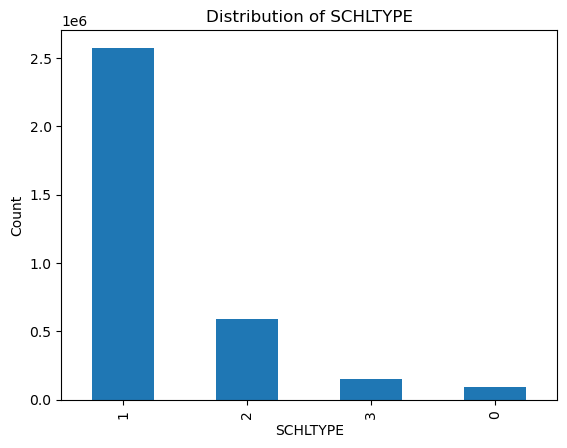

In [13]:
data['SCHLTYPE'].value_counts().plot(kind='bar', title='Distribution of SCHLTYPE')
plt.xlabel('SCHLTYPE')
plt.ylabel('Count')
plt.show()

What does 1, 2, 3, 0 mean? Look at the codebook! 

The variable SCHLTYPE determines whether the person is in a Public or private school. 

0 is the value for N/A. 1 is the value for not-enrolled. 2 is the value for a public school. 3 is the value for a private school. 

<Axes: title={'center': 'Distribution of SCHLTYPE'}, xlabel='SCHLTYPE'>

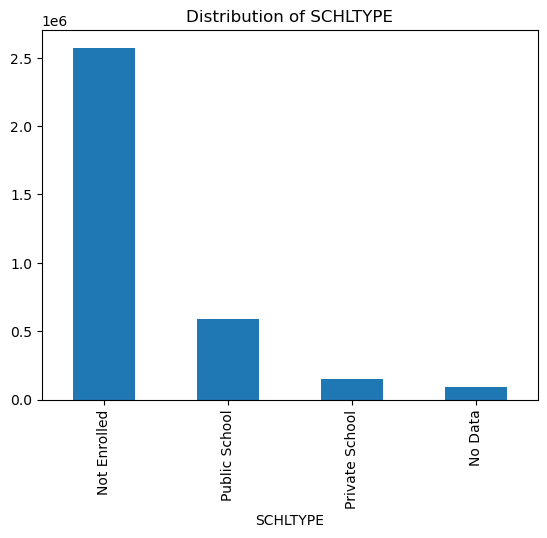

In [14]:
data['SCHLTYPE'] = data['SCHLTYPE'].replace({
    0: "No Data",
    1: "Not Enrolled",
    2: "Public School",
    3: "Private School"
})
data

data['SCHLTYPE'].value_counts().plot(kind = 'bar', title = 'Distribution of SCHLTYPE')

## Step 4. Outlier detection and treatment

Now, let's look at some anomalous income values that may potentially exist.

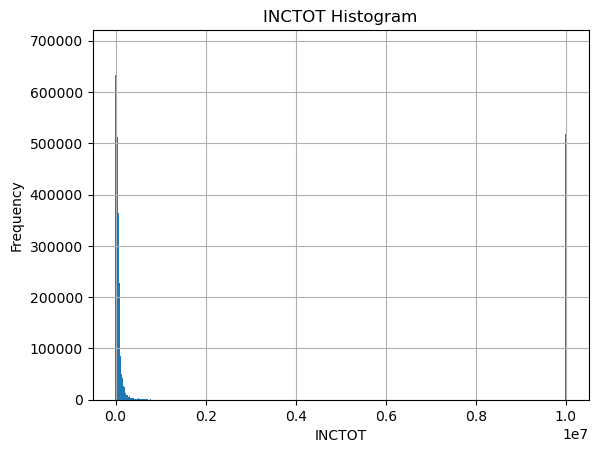

In [15]:
data['INCTOT'].hist(bins=500)
plt.xlabel('INCTOT')
plt.ylabel('Frequency')
plt.title('INCTOT Histogram')
plt.show()

There really is no standard way to deal with outlying observations. For now, let us just try one ad hoc approach 

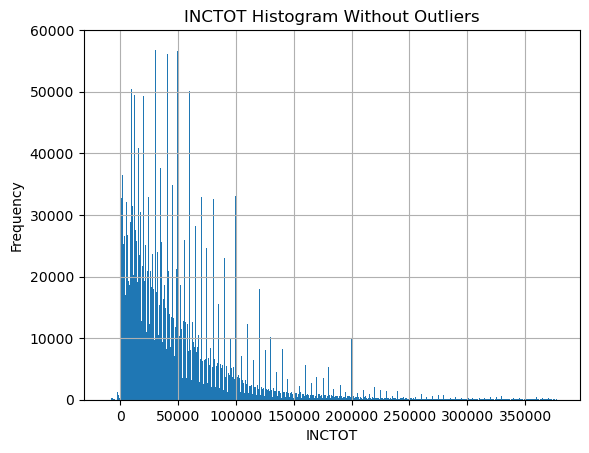

In [16]:
# Calculate Q1, Q3, and IQR
Q1 = data['INCTOT'].quantile(0.25)
Q3 = data['INCTOT'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR


# Filter the data to exclude outliers
filtered_data = data[(data['INCTOT'] >= lower_bound) & (data['INCTOT'] <= upper_bound)]

# Plot the histogram again
filtered_data['INCTOT'].hist(bins=500)
plt.xlabel('INCTOT')
plt.ylabel('Frequency')
plt.ylim(0, 60000)
plt.title('INCTOT Histogram Without Outliers')
plt.show()

There's still some outliers, particularly 0 income and also the negatives. Although plausible, let us take it out. 

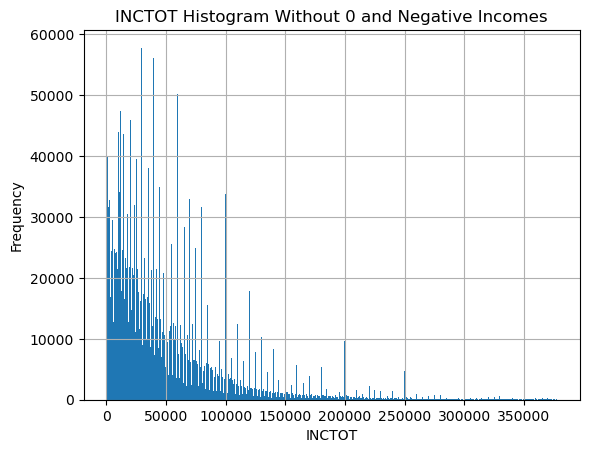

In [17]:
# Filter out rows with 0 or negative incomes
positive_income_data = filtered_data[filtered_data['INCTOT'] > 0]

# Plot the histogram again
positive_income_data['INCTOT'].hist(bins=500)
plt.xlabel('INCTOT')
plt.ylabel('Frequency')
plt.title('INCTOT Histogram Without 0 and Negative Incomes')
plt.show()

In [ ]:
# data_aux = positive_income_data[['AGE', 'INCTOT']]
# data_aux = data_aux.sample(n=10000, random_state=1).reset_index(drop=True)
# data_aux

,AGE,INCTOT
0,39,89500
1,61,32000
2,36,33000
3,34,10000
4,46,35000
...,...,...
9995,56,190100
9996,31,36000
9997,79,47900
9998,83,331500


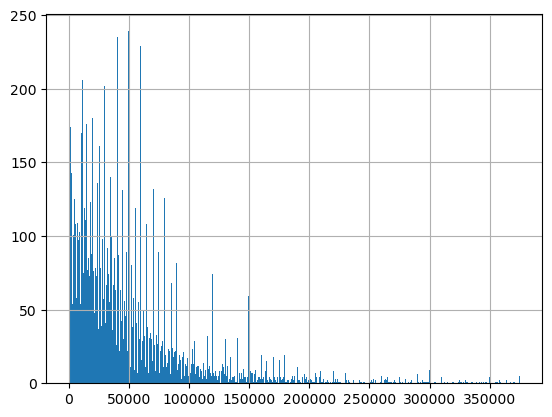

Saved data_aux to c:\Users\jbaca\OneDrive\Documents\2. Ph.D. in Economics\Courses\Semester 7 - Fall 2025\ECON 220 - Data Science for Economists - Lab\Lectures\Week 9\data_aux.csv


In [ ]:
# data_aux['INCTOT'].hist(bins=500)
# plt.show()
# csv_path = os.path.join(path, 'data_aux.csv')
# data_aux.to_csv(csv_path, index=False)
# print(f"Saved data_aux to {csv_path}")

## Step 5. Random sample 

Let us now get a random sample from this filtered dataset. 

Getting a random sample is useful because:

- Speeds up analysis and plotting on very large datasets (lower memory and compute).
- Enables quick prototyping and testing of cleaning, visualizations, and models before scaling to full data.
- Among others...

In [11]:
random_sample = positive_income_data.sample(n=300, random_state=30)
random_sample

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STRATA,GQ,PERNUM,PERWT,SEX,AGE,MARST,RACE,RACED,HCOVANY,EDUC,EDUCD,SCHLTYPE,INCTOT
1768371,2023,202301,788031,2023000782326,33.0,2023007880311,200229,1,1,33.0,1,46,4,1,100,2,7,71,Not Enrolled,54000
3335370,2023,202301,1486405,2023001296081,62.0,2023014864051,90054,1,1,62.0,2,58,1,1,100,2,6,63,Not Enrolled,55000
482399,2023,202301,207409,2023001156775,120.0,2023002074091,651406,1,1,120.0,1,43,1,7,700,2,3,30,Not Enrolled,98000
1625037,2023,202301,721830,2023001189410,188.0,2023007218301,140026,1,6,138.0,2,22,6,1,100,1,6,63,Not Enrolled,15000
495186,2023,202301,212173,2023001206338,198.0,2023002121731,970506,1,1,199.0,2,61,5,1,100,2,6,65,Not Enrolled,126800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2958552,2023,202301,1328178,2023000723562,51.0,2023013281781,230148,1,1,51.0,1,39,1,1,100,2,6,63,Not Enrolled,70000
900112,2023,202301,396458,2023000057762,51.0,2023003964581,470213,1,2,58.0,2,81,5,8,802,2,6,64,Not Enrolled,22500
283760,2023,202301,132854,2023000379611,36.0,2023001328541,410306,1,1,36.0,1,69,1,1,100,2,8,81,Not Enrolled,12700
1007998,2023,202301,440643,2023000608095,186.0,2023004406431,30415,1,1,186.0,1,44,4,2,200,2,11,115,Not Enrolled,100000


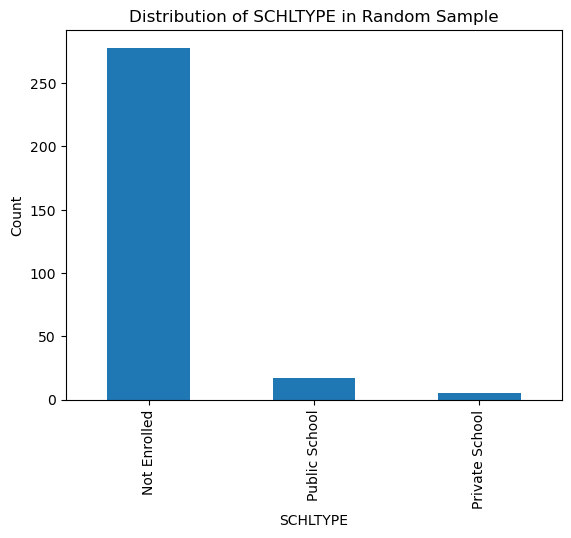

In [12]:
random_sample['SCHLTYPE'].value_counts().plot(kind='bar', title='Distribution of SCHLTYPE in Random Sample')
plt.xlabel('SCHLTYPE')
plt.ylabel('Count')
plt.show()

In [13]:
# Filter out rows where SCHLTYPE is "Not Enrolled"
enrolled_data = positive_income_data[positive_income_data['SCHLTYPE'].isin(['Public School', 'Private School'])]

# Compute the mean INCTOT for Public School and Private School
mean_inctot = enrolled_data.groupby('SCHLTYPE')['INCTOT'].mean()
print(mean_inctot) 

# Calculate the difference in mean INCTOT between Private and Public School
difference = mean_inctot['Private School'] - mean_inctot['Public School']
print(f"Difference (Private - Public): {difference:.2f}")

SCHLTYPE
Private School    26312.427345
Public School     22119.912597
Name: INCTOT, dtype: float64
Difference (Private - Public): 4192.51


Let's answer the following question: **If we only look at a small sample of people, how much does our estimate of the income difference between private and public school attendees change from sample to sample?**

In [14]:
differences = []

for _ in range(100):
    # Generate a random sample of 300
    random_sample = positive_income_data.sample(n=300, random_state=None)
    
    # Filter out rows where SCHLTYPE is "Not Enrolled"
    enrolled_sample = random_sample[random_sample['SCHLTYPE'].isin(['Public School', 'Private School'])]
    
    # Compute the mean INCTOT for Public School and Private School
    mean_inctot_sample = enrolled_sample.groupby('SCHLTYPE')['INCTOT'].mean()
    
    # Compute the difference in mean income
    if 'Public School' in mean_inctot_sample and 'Private School' in mean_inctot_sample:
        difference = mean_inctot_sample['Private School'] - mean_inctot_sample['Public School']
        differences.append(difference)

# Print the differences
print(differences)

# Calculate and display the mean difference
mean_difference = np.mean(differences)
print(f"Mean Difference: {mean_difference}")

[23690.934065934067, -19179.666666666664, 15310.0, -6046.666666666668, -12778.947368421053, 1585.60606060606, 22964.880952380954, 19895.714285714283, 6722.222222222223, 45800.86956521739, -14281.81818181818, 11218.260869565216, 30309.2, 4801.304347826088, 9884.95, 9474.861111111111, -15351.515151515148, 6416.904761904763, 3782.6098901098885, 21213.333333333336, 973.0, 27731.0989010989, 16781.21212121212, 20984.444444444445, 14950.0, -5193.75, -6105.0, 32005.84541062802, 20460.0, 15702.934782608696, 2812.380952380954, 1698.1987577639811, 18407.368421052633, -10301.333333333332, 6450.0, -9112.5, -14051.666666666664, -4873.727272727272, 22489.130434782608, 20410.434782608696, -1584.782608695652, -15450.833333333334, 24762.5, 32118.88888888889, 7483.782051282047, 6167.5, -11915.882352941175, 716.6666666666679, 9175.0, -4639.285714285717, -1127.619047619046, -29463.88888888889, 6349.130434782608, -481.9047619047633, 18276.666666666664, 2282.2222222222226, -9597.543859649122, -10566.42857142

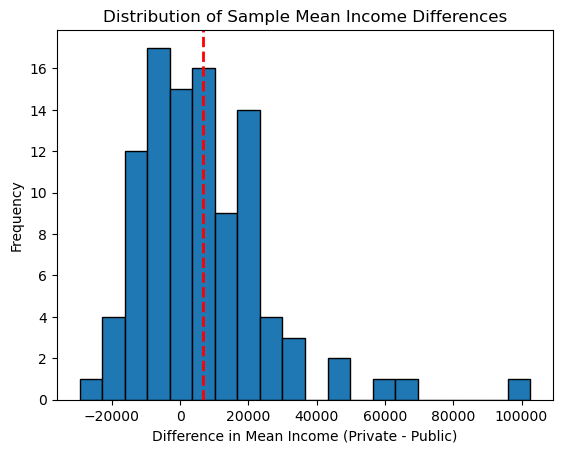

The mean of the differences is: 6717.92
The standard deviation of the differences (Standard Error) is: 19368.35


In [15]:
# Plot the distribution of the differences
plt.hist(differences, bins=20, edgecolor='black')
plt.title('Distribution of Sample Mean Income Differences')
plt.xlabel('Difference in Mean Income (Private - Public)')
plt.ylabel('Frequency')
plt.axvline(mean_difference, color='red', linestyle='dashed', linewidth=2)
plt.show()

print(f"The mean of the differences is: {mean_difference:.2f}")
print(f"The standard deviation of the differences (Standard Error) is: {np.std(differences):.2f}")